In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

In [2]:
X = np.fft.fft(xn)
ff = np.linspace(0,1,N)
fc = 0.06

X[(ff>fc) & (ff<(1./dt-fc))]=1.e-15
y = np.real(np.fft.ifft(X))

Gxx,f = mlab.psd(xn, Fs=1, NFFT=256)
Gyy,f = mlab.psd(y, Fs=1, NFFT=256)
H = np.sqrt(Gyy/Gxx)

Gxy,f  = mlab.csd(xn,y,Fs=1./dt,NFFT=256)

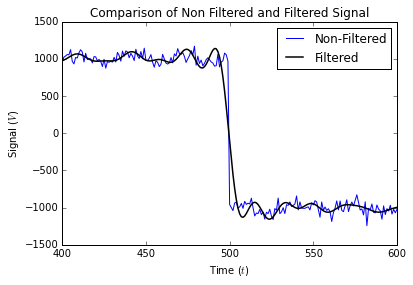

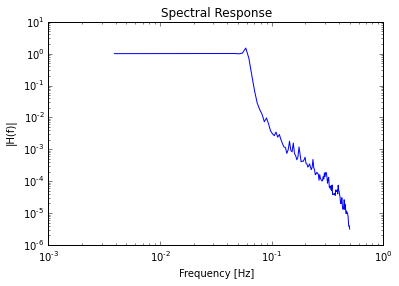

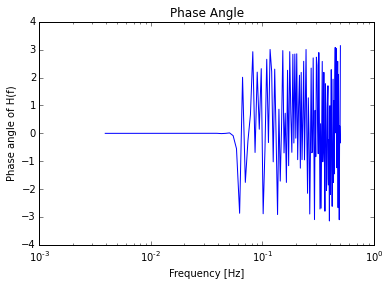

In [3]:
plt.plot(t, xn, label = 'Non-Filtered')
plt.plot(t, y,'k', label = 'Filtered', linewidth = 1.5)
plt.xlim([400,600])
plt.ylabel(r'Signal ($V$)');plt.xlabel(r'Time ($t$)');plt.title('Comparison of Non Filtered and Filtered Signal')
plt.legend(loc=0)
plt.show()

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.loglog(f, H)
ax.set_xlabel('Frequency [Hz]');ax.set_ylabel('|H(f)|');ax.set_title('Spectral Response')
plt.show()

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.semilogx(f,np.angle(Gxy))
ax.set_xlabel('Frequency [Hz]');ax.set_ylabel('Phase angle of H(f)');ax.set_title('Phase Angle')
plt.show()

The filter works quite well, removing the high frequencies while leaing the low frequencies alone. The drop off between the low and high frequencies is quite steep as well. However there is a slight increase in the frequencies at the edge of the range right before the dropoff.

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

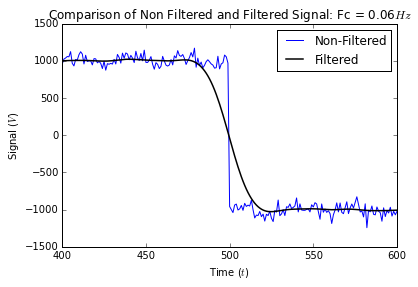

In [4]:
Xn = np.fft.fft(xn)  
K = 101
fn = ff*0. + 1.e-5
fn[(ff<fc) | (ff>1-fc)] = 1.

han = np.hanning(K)
fn[:K/2] = fn[:K/2] * han[K/2+1:]
fn[N-K/2:] = fn[N-K/2:] * han[:K/2]

han =  np.hanning(120)
fn[:60] = fn[:60]*han[60:]
fn[N-61:] = fn[N-61:]*han[:61]

XX = Xn*fn
y2 = np.real(np.fft.ifft(XX))
plt.plot(xn, label = 'Non-Filtered')
plt.plot(y2,'k', label = 'Filtered', linewidth = 1.5)
plt.xlim([400,600])
plt.ylabel(r'Signal ($V$)')
plt.xlabel(r'Time ($t$)')
plt.title(r'Comparison of Non Filtered and Filtered Signal: Fc = 0.06$Hz$')
plt.legend(loc=0)

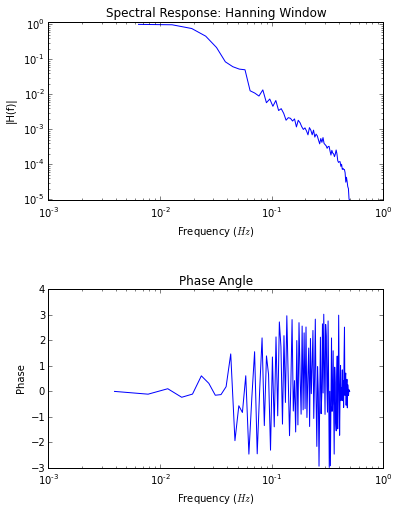

In [5]:
Gyy,f = mlab.psd(y2,Fs = 1, NFFT = 156)
Gxx,f = mlab.psd(xn,Fs = 1, NFFT = 156)
H2 = np.sqrt(Gyy/Gxx)
fig, ax = plt.subplots(2,1, figsize=(6,8))
ax[0].loglog(f,H2)
ax[0].set_ylim([-0.2, 1.2])
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H(f)|')
ax[0].set_title('Spectral Response: Hanning Window')

Gxy,f = mlab.csd(xn,y2, Fs = 1., NFFT = 256)
ax[1].semilogx(f,np.angle(Gxy))
ax[1].set_title('Phase Angle')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_ylabel('Phase')
plt.subplots_adjust(hspace = 0.5)

Here the bump in the frequencies is gone, but the drop off is much less steep and many of the desired frequencies have been slightly suppressed. There also appears to be more varation in the phase.

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

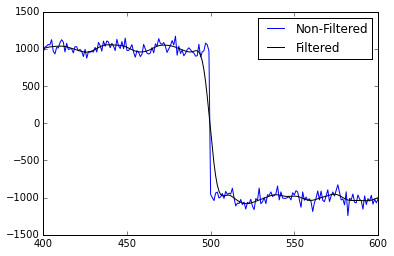

In [6]:
Xn = np.fft.fft(xn)  
fbx = ff*0. + 1.e-15
fc2 = fc*2
fbx[(ff<fc2) | (ff>1-fc2)] = 1.

han2 =  np.hanning(120*2)
fbx[:120] = fbx[:120]*han2[120:]
fbx[N-121:] = fbx[N-121:]*han2[:121]
Xbx = Xn*fbx
Ybx = np.real(np.fft.ifft(Xbx))
plt.plot(xn,label='Non-Filtered')
plt.plot(Ybx,'k',label='Filtered')
plt.xlim([400,600])
plt.legend()

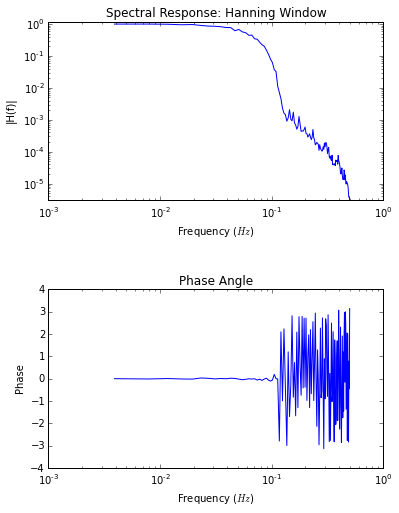

In [7]:
Gxbx,f = mlab.psd(xn,Fs=1,NFFT=256)
Gybx,f = mlab.psd(Ybx,Fs=1,NFFT=256)
Hbx = np.sqrt(Gybx/Gxbx)

fig, ax = plt.subplots(2,1, figsize=(6,8))
ax[0].loglog(f,Hbx)
ax[0].set_ylim([-0.2, 1.2])
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H(f)|')
ax[0].set_title('Spectral Response: Hanning Window')

Gxy,f = mlab.csd(xn,Ybx, Fs = 1., NFFT = 256)
ax[1].semilogx(f,np.angle(Gxy))
ax[1].set_title('Phase Angle')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_ylabel('Phase')
plt.subplots_adjust(hspace = 0.5)

This filter is somewhat inbetween the other two. The bump and the end of the range is removed, and it has a dropoff not quight as good as the first, but significantly better that the second. This filter also keeps the phase very calm with very little change.

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

(-100, 100)

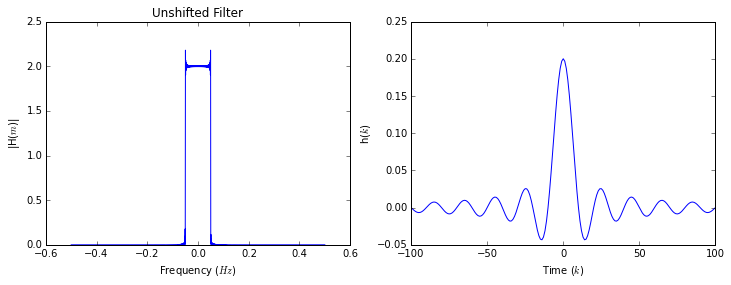

In [10]:
N=20000
x = np.cumsum(np.random.randn(N))
x = x-np.mean(x)

fc = 0.1
M = 2*N*fc+1
m = np.linspace(-0.5, 0.5, N-1)
k = np.array(range(-N/2+1,N/2))
h = (1./N)*np.sin(np.pi*(k+0.000001)*M/N/2)/np.sin(np.pi*(k+0.000001)/N/2)

K = 2000
h1 = h
h1[abs(k)>(K-1)/2]=0
H1 = np.fft.fftshift(np.fft.fft(h1))
hk = np.fft.ifft(H1)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(m,abs(H1))
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H($m$)|')
ax[0].set_title('Unshifted Filter')
ax[1].plot(k,h)
ax[1].set_ylabel(r'h($k$)')
ax[1].set_xlabel(r'Time ($k$)')
ax[1].set_xlim([-100,100])

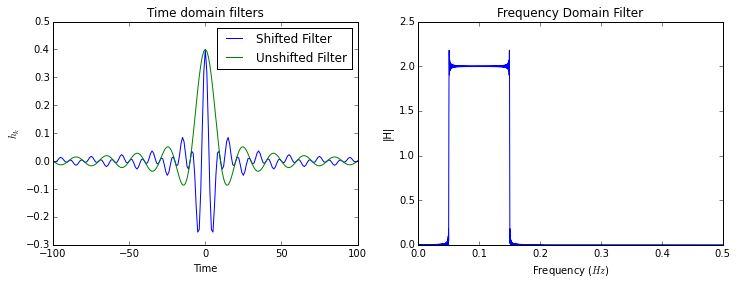

In [11]:
fig, ax=plt.subplots(1,2, figsize = (12,4))
m = 0.1*N
h_shift = 2*h*np.cos(2*np.pi*m*k/N)    
ax[0].plot(k,h_shift, label = 'Shifted Filter')
ax[0].plot(k,2*h, label = 'Unshifted Filter')
ax[0].set_xlim([-100,100])
ax[0].set_xlabel('Time')
ax[0].set_ylabel(r'$h_k$')
ax[0].legend(loc=0)
ax[0].set_title('Time domain filters')
hfft = np.fft.fftshift(np.fft.fft(h_shift))
fh = np.linspace(-0.5,0.5,len(hfft))
ax[1].plot(fh,abs(hfft))
ax[1].set_xlim([0,0.5])
ax[1].set_ylabel(r'|H|')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_title('Frequency Domain Filter')

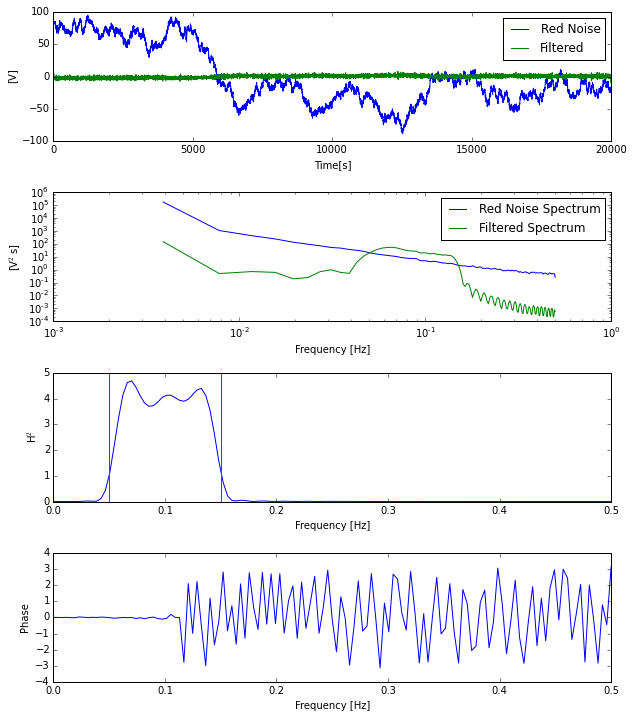

In [12]:
filtlen=25
hs2 = h_shift[abs(k)<filtlen+1]

y = np.convolve(x,hs2,mode='same')

Gxx,f = mlab.psd(x,Fs=1.,NFFT=256,noverlap=128)
Gyy,f = mlab.psd(y,Fs=1.,NFFT=256,noverlap=128)

fig, ax = plt.subplots(4,1, figsize = (10,12))
ax[0].plot(x,label='Red Noise')
ax[0].plot(y,label='Filtered')
ax[0].set_xlabel('Time[s]')
ax[0].set_ylabel('[V]')
ax[0].legend()

ax[1].loglog(f,Gxx,label='Red Noise Spectrum')
ax[1].loglog(f,Gyy,label='Filtered Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('[V$^2$s]')
ax[1].legend()

ax[2].plot(f,abs(Gyy/Gxx))
ax[2].axvline(x=0.05,ymin=0,ymax=1,color='r')
ax[2].axvline(x=0.15,ymin=0,ymax=1,color='r')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('H$^2$')

ax[3].plot(f,np.angle(Gxy))
ax[3].set_xlabel('Frequency [Hz]')
ax[3].set_ylabel('Phase')

plt.subplots_adjust(hspace = 0.4)

## Q3: Bandpass the weather data

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

In [16]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

dcm = dc-np.mean(dc)
t = np.linspace(0,len(dc),len(dc))

In [17]:
fs = 1./60
fnyq = fs/2.
nfft = int(len(dc)/8.)

Tday = 24.*60*60
fday = 1./Tday

fpl = 1.25*fday
fsl = 10*fday
nlow,fnlow = signal.ellipord(fpl/fnyq, fsl/fnyq,0.1,40.)
blow,alow = signal.ellip(nlow,0.5,20,fnlow,btype='lowpass')
ylow = signal.filtfilt(blow,alow,dcm)

fph = 0.75+fday
fsh = 0.01*fday
nhigh,fnhigh = signal.ellipord(fph/fnyq, fsh/fnyq,0.1,40.)
bhigh,ahigh = signal.ellip(nlow,0.5,20,fnhigh,btype='highpass')
y = signal.filtfilt(bhigh,ahigh,ylow)

Gdc,f1 = mlab.psd(dc,NFFT=nfft,Fs=fs)
Gfil,f2 = mlab.psd(y-np.mean(y),NFFT=nfft,Fs=fs)
H = np.sqrt(Gfil/Gdc)


/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


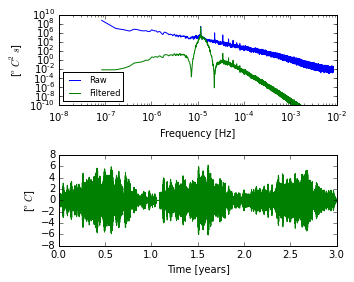

In [38]:
fig, ax = plt.subplots(2,1, figsize = (5,4))
#ax[1].plot(t/60./24./365.25,dc,label='Raw')
ax[1].plot(t/60./24./365.25,y,'g')
ax[1].set_xlabel('Time [years]')
ax[1].set_ylabel('[$^oC$]')
ax[1].legend(loc=2,fontsize='small')
#ax[1].set_ylim([0,30])

ax[0].loglog(f1,Gdc,label='Raw')
ax[0].loglog(f2,Gfil,label='Filtered')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('[$^oC^2s$]')
ax[0].legend(loc=3,fontsize='small')
ax[0].set_ylim([10**-10,10**10])
plt.tight_layout()

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

In [ ]:
mxy = signal.argrelextrema(y,np.greater)
mny = signal.argrelextrema(y,np.less)
mny = mny[0]
mny = mny[:-1]
ydiff = abs(y[mxy]-y[mny])

plt.plot(t[mxy]/24./60./365,ydiff)
plt.xlabel('Time [Years]')
plt.ylabel('[$^oC$]')

The amplitudes appear to have the greatest variation durring the summer, and lower variation in the winter. This makes sence as the temperture range from day to night in the summer is muc larger.